This code uses the K-Nearest Neighbors (KNN) method to predict values from data. It helps load and organize data, create charts, prepare the data for the model, train the model, and check how accurate its predictions are. The process includes splitting the data into training and testing sets, scaling the features so the model works better, and then measuring how well the model performs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

import data set

In [ ]:
df = pd.read_csv(r'/workspaces/CS_Group_09_Salary_prediction/data/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


drop null values

In [ ]:
df = df[['Age', 'Gender', 'Job Title', 'Education Level', 'Years of Experience', 'Salary']].dropna()

df.shape simply shows the size of your dataset, telling you how many entries (rows) it has and how many details (columns) each entry includes.

In [ ]:
df = df[['Age', 'Gender', 'Job Title', 'Education Level', 'Years of Experience', 'Salary']].dropna()

shows the quick summery of the data set


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Job Title            6698 non-null   object 
 3   Education Level      6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


gives a quick summary of the numerical columns in your dataset.

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


This checks each row in the dataframe and returns True if the row is a duplicate.

In [ ]:
df.duplicated().sum()


np.int64(4911)

splitting your dataset into input and output parts for machine learning.

In [ ]:

X = df.iloc[:, :-1]  # independent variables
y = df.iloc[:, -1]   # salary column

This code cleans your dataset by removing outliers. It picks only the numeric columns and checks each one to find values that are too high or too low compared to the rest. It does this by calculating a normal range using Q1, Q3, and the IQR. Any value outside this range is treated as an outlier, and that entire row is removed. In simple terms, it keeps only the “normal” data and removes the unusual values so your dataset becomes cleaner and more accurate.

In [ ]:
import pandas as pd

# Assuming your dataset is already loaded
# df = pd.read_csv("your_dataset.csv")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply IQR method to remove outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only data within range
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("✅ Outliers removed successfully!")
print("Remaining data shape:", df.shape)


✅ Outliers removed successfully!
Remaining data shape: (6550, 6)


This code splits your data into training and testing parts, then prepares the numerical and categorical columns by scaling numbers and converting text into usable form. After that, it builds a KNN model and connects everything together in one pipeline. Finally, it trains the model using the training data so it can learn and make predictions.

In [ ]:
# Train the final KNN using pipeline
final_knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=best_k))
])

final_knn_pipeline.fit(X_train, y_train)

# Make predictions (pipeline handles scaling and encoding)
y_pred_final = final_knn_pipeline.predict(X_test)

# Final metrics
mae_f = mean_absolute_error(y_test, y_pred_final)
mse_f = mean_squared_error(y_test, y_pred_final)
rmse_f = mse_f ** 0.5
r2_f = r2_score(y_test, y_pred_final)

print(f'Final KNN Performance (k={best_k}):')
print('MAE:', round(mae_f, 2))
print('MSE:', round(mse_f, 2))
print('RMSE:', round(rmse_f, 2))
print('R2 Score:', round(r2_f, 4))


NameError: name 'preprocessor' is not defined



This code is checking how good your model’s predictions are. MAE shows the average difference between the real values and your predictions. MSE and RMSE tell you how big the errors are, with RMSE being easier to understand. The R² score tells you how well your model fits the data, where higher is better. Finally, it prints all these results so you can quickly see how well your model performed.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = pipeline.predict(X_test)
# ✅ Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5   # RMSE manually

r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MAE: 4472.576012793177
MSE: 102792106.20668598
RMSE: 10138.64419962975
R2 Score: 0.9639510519889993


This code tests different values of k for the K-Nearest Neighbors model to find the one that works best. It loops through k from 1 to 20, trains the model with each k, and records the mean absolute error (MAE) and R² score for the predictions. Then, it plots MAE vs k and R² vs k side by side so you can visually see which k gives the lowest error and highest R². Finally, it identifies the best k based on the lowest MAE and prints the corresponding MAE and R² score.

/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/prep

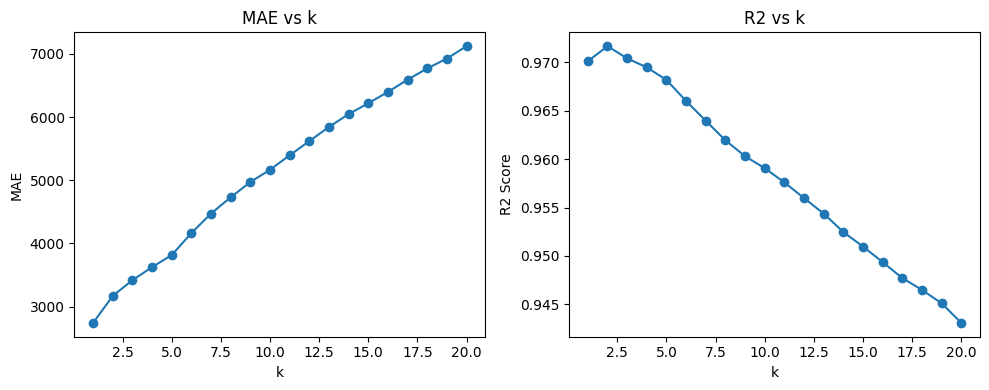

Best k by MAE: 1
Minimum MAE: 2742.755223880597
R2 at best k: 0.9700954964495575


In [ ]:
ks = range(1, 21)
errors = []
r2_scores = []

# Loop through k values
for k in ks:
    model = Pipeline([
        ('preprocess', preprocessor),  # your preprocessor from before
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    errors.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(ks, errors, marker='o')
plt.xlabel("k")
plt.ylabel("MAE")
plt.title("MAE vs k")

plt.subplot(1, 2, 2)
plt.plot(ks, r2_scores, marker='o')
plt.xlabel("k")
plt.ylabel("R2 Score")
plt.title("R2 vs k")

plt.tight_layout()
plt.show()

# -------------------------
# Best K
# -------------------------
best_k = ks[int(np.argmin(errors))]
print("Best k by MAE:", best_k)
print("Minimum MAE:", min(errors))
print("R2 at best k:", r2_scores[np.argmin(errors)])

This code trains the final K-Nearest Neighbors (KNN) model using the best number of neighbors found earlier, then uses it to make predictions on the test data. After predicting, it evaluates the model’s performance using common metrics: MAE (average prediction error), MSE (error squared to penalize bigger mistakes), RMSE (square root of MSE for easier interpretation), and R² score (how well the model explains the variation in the data). Finally, it prints a neat summary of these results, giving a clear picture of how accurate and reliable the model is.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the final KNN model using the pipeline
final_knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # your preprocessor
    ('knn', KNeighborsRegressor(n_neighbors=best_k))
])

final_knn_pipeline.fit(X_train, y_train)

# Make predictions (pipeline handles scaling and encoding automatically)
y_pred_final = final_knn_pipeline.predict(X_test)

# Evaluate performance
mae_f = mean_absolute_error(y_test, y_pred_final)
mse_f = mean_squared_error(y_test, y_pred_final)
rmse_f = mse_f ** 0.5
r2_f = r2_score(y_test, y_pred_final)

print(f'Final KNN Performance (k={best_k}):')
print('MAE:', round(mae_f, 2))
print('MSE:', round(mse_f, 2))
print('RMSE:', round(rmse_f, 2))
print('R2 Score:', round(r2_f, 4))


/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Final KNN Performance (k=1):
MAE: 2742.76
MSE: 85271473.22
RMSE: 9234.26
R2 Score: 0.9701


This code is used to figure out the best number of neighbors (k) for the KNN model. It tests k values from 1 to 20, and for each one, it builds a model that first prepares the data and then applies KNN. The model is trained on the training data, makes predictions on the test set, and calculates the average error (MAE) to see how accurate it is. All the errors are collected and then plotted, so you can easily see which k gives the lowest error and choose the best one for your model.

/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/prep

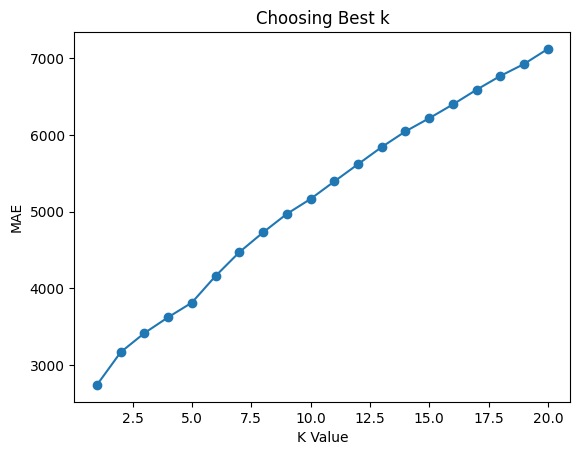

In [ ]:
errors = []

for k in range(1, 21):
    model = Pipeline([
        ('preprocess', preprocessor),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    errors.append(mean_absolute_error(y_test, pred))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K Value')
plt.ylabel('MAE')
plt.title('Choosing Best k')
plt.show()

This code measures how well your model is performing on both the training and test data. It first predicts the values for the training set and calculates the R² score to see how much of the training data’s variation the model can explain. Then it predicts the test set and calculates the R² again to check how well the model handles new, unseen data. Finally, it prints both scores so you can easily see if your model is doing well, or if it might be overfitting or underfitting.

In [ ]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train R²: 0.9498626924404528
Test R²: 0.943093479764259


This code saves your trained KNN model to a file called "KNN_salary_model.pkl" so you can use it later without retraining. It also prints a message to confirm that the model was saved successfully.

In [ ]:
import joblib

# Save KNN model
joblib.dump(model, "KNN_salary_model.pkl")
print("\nModel saved as KNN_salary_model.pkl")


Model saved as KNN_salary_model.pkl
